In [19]:
from numpy.random import seed
seed(1)
from tensorflow import random
random.set_seed(2)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM, Bidirectional
import math
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score
from numpy import array

In [20]:
data=pd.read_csv("../data/DPL.csv")
data

,DateTime,DPL
0,2020-04-23 06:34:02,15
1,2020-04-23 09:34:02,15
2,2020-04-24 06:34:01,16
3,2020-04-24 09:34:02,16
4,2020-04-27 06:33:57,16
...,...,...
2497,2022-07-14 04:55:53,13
2498,2022-07-14 05:55:54,13
2499,2022-07-14 07:55:52,13
2500,2022-07-14 08:55:53,13


In [21]:
#Changing datetime to datetime format
data['DateTime'] = pd.to_datetime(data['DateTime']).dt.date

#renaming the columns
data.rename(columns = {'DateTime':'date','DPL':'price'}, inplace = True)
data['date'] = pd.to_datetime(data['date'],format = "%Y-%m-%d")
data

,date,price
0,2020-04-23,15
1,2020-04-23,15
2,2020-04-24,16
3,2020-04-24,16
4,2020-04-27,16
...,...,...
2497,2022-07-14,13
2498,2022-07-14,13
2499,2022-07-14,13
2500,2022-07-14,13


In [22]:
data = data.groupby('date').mean()
data

,price
date,
2020-04-23,15.0
2020-04-24,16.0
2020-04-27,16.0
2020-04-28,16.0
2020-04-29,16.0
...,...
2022-07-11,13.0
2022-07-12,13.0
2022-07-13,13.0


In [23]:
data1 = data.reset_index()['price']
data1

0      15.0
1      16.0
2      16.0
3      16.0
4      16.0
       ... 
543    13.0
544    13.0
545    13.0
546    13.0
547    13.0
Name: price, Length: 548, dtype: float64

In [24]:
print("Size of the dataset: ",data1.shape)
print("Checking for null values:\n",data1.isnull().sum())
print("Checking Data-type of each column:\n",data1.dtypes)

Size of the dataset:  (548,)
Checking for null values:
 0
Checking Data-type of each column:
 float64


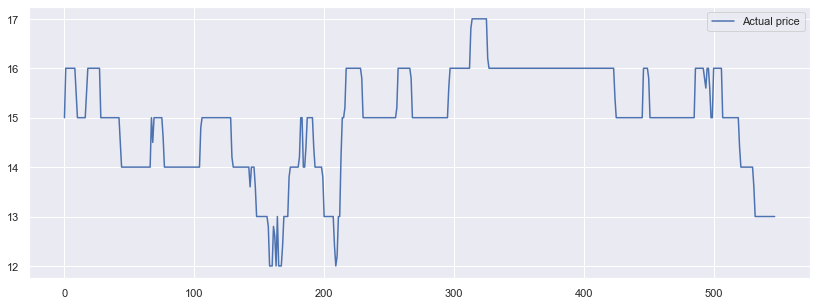

In [25]:
plt.figure(figsize=(14,5))
plt.plot(data1,label='Actual price')
plt.legend()
plt.show()

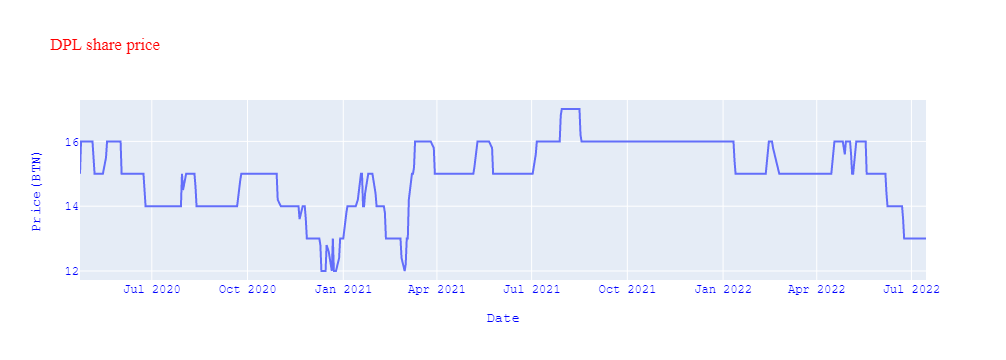

In [26]:
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scatter(x = data.index, y = data["price"], name="price", mode="lines"))

fig.update_layout(
    title = 'DPL share price',
    font_family="Courier New",
    font_color="blue",
    title_font_family="Times New Roman",
    title_font_color="red",
    xaxis_title = 'Date',
    yaxis_title = 'Price(BTN)'
)


fig.show()

In [27]:
data1.describe()

count    548.000000
mean      14.970073
std        1.049793
min       12.000000
25%       14.000000
50%       15.000000
75%       16.000000
max       17.000000
Name: price, dtype: float64

In [28]:
scaler = MinMaxScaler(feature_range=(0,1))
data1 = scaler.fit_transform(np.array(data1).reshape(-1,1))

In [29]:
size = int(len(data) * 0.65)
X_train, X_test = data[0:size], data[size:len(data)]

In [30]:
training_size=int(len(data1)*0.65)
test_size=len(data1)-training_size
train_data,test_data=data1[0:training_size,:],data1[training_size:len(data1),:1]

In [31]:
len(train_data)

356

In [32]:
len(train_data),len(test_data)

(356, 192)

In [33]:
training_size,test_size

(356, 192)

In [34]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [35]:
import numpy
time_step = 10
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [36]:
print(X_train.shape), print(y_train.shape)

(345, 10)
(345,)


(None, None)

In [37]:
print(X_test.shape), print(ytest.shape)

(181, 10)
(181,)


(None, None)

In [38]:
X_train.shape[1]

10

In [39]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [40]:
model=Sequential()
model.add(Bidirectional(LSTM(64,activation='relu', return_sequences=False,input_shape=(time_step,1))))
#model.add(Bidirectional(LSTM(50,activation='relu')))
model.add(Dense(64))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
#model.summary()

In [41]:
history = model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=200,verbose=2)

Epoch 1/200
11/11 - 3s - loss: 0.0998 - val_loss: 0.0279 - 3s/epoch - 231ms/step
Epoch 2/200
11/11 - 0s - loss: 0.0264 - val_loss: 0.0089 - 88ms/epoch - 8ms/step
Epoch 3/200
11/11 - 0s - loss: 0.0175 - val_loss: 0.0088 - 97ms/epoch - 9ms/step
Epoch 4/200
11/11 - 0s - loss: 0.0127 - val_loss: 0.0058 - 94ms/epoch - 9ms/step
Epoch 5/200
11/11 - 0s - loss: 0.0101 - val_loss: 0.0050 - 110ms/epoch - 10ms/step
Epoch 6/200
11/11 - 0s - loss: 0.0083 - val_loss: 0.0037 - 108ms/epoch - 10ms/step
Epoch 7/200
11/11 - 0s - loss: 0.0067 - val_loss: 0.0032 - 108ms/epoch - 10ms/step
Epoch 8/200
11/11 - 0s - loss: 0.0063 - val_loss: 0.0034 - 100ms/epoch - 9ms/step
Epoch 9/200
11/11 - 0s - loss: 0.0058 - val_loss: 0.0031 - 99ms/epoch - 9ms/step
Epoch 10/200
11/11 - 0s - loss: 0.0054 - val_loss: 0.0036 - 101ms/epoch - 9ms/step
Epoch 11/200
11/11 - 0s - loss: 0.0051 - val_loss: 0.0036 - 106ms/epoch - 10ms/step
Epoch 12/200
11/11 - 0s - loss: 0.0048 - val_loss: 0.0030 - 108ms/epoch - 10ms/step
Epoch 13/200


In [42]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 128)              33792     
 l)                                                              
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 42,113
Trainable params: 42,113
Non-trainable params: 0
_________________________________________________________________


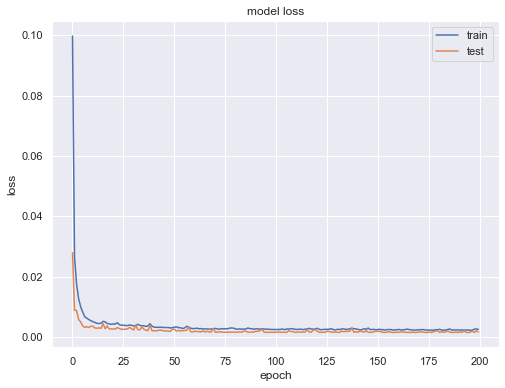

In [43]:
from matplotlib.pyplot import figure
figure(figsize=(8, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [44]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

6/6 [==============================] - 0s 3ms/step


In [45]:
rstrain_predict=scaler.inverse_transform(train_predict)
rstest_predict=scaler.inverse_transform(test_predict)
rsytest=scaler.inverse_transform(np.array(ytest).reshape(-1,1))
rsytrain=scaler.inverse_transform(np.array(y_train).reshape(-1,1))

In [46]:
RMSE_train=math.sqrt(mean_squared_error(rsytrain,rstrain_predict))
print(RMSE_train)

0.24086955075758698


In [47]:
RMSE_test=math.sqrt(mean_squared_error(rsytest,rstest_predict))
MAE_test=mean_absolute_error(rsytest,rstest_predict)
R2_test=r2_score(rsytest,rstest_predict)
print("RMSE:", RMSE_test)
print("MAE:", MAE_test)
print("R-Squared:", R2_test)

RMSE: 0.20336254365141856
MAE: 0.10761472691488527
R-Squared: 0.9480138876850934


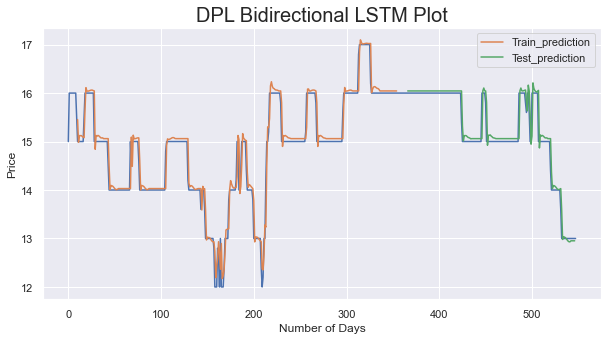

In [48]:
look_back=10
trainPredictPlot = numpy.empty_like(data1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = rstrain_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(data1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(data1)-1, :] = rstest_predict
# plot baseline and predictions
plt.figure(figsize=(10,5))
plt.plot(scaler.inverse_transform(data1))
plt.plot(trainPredictPlot,label='Train_prediction')
plt.plot(testPredictPlot, label='Test_prediction')
plt.title('DPL Bidirectional LSTM Plot', fontsize=20)
plt.ylabel('Price')
plt.xlabel('Number of Days')
plt.legend()
plt.show()

In [49]:
len(test_data)

192

In [50]:
x_input=test_data[182:].reshape(1,-1)
x_input.shape

(1, 10)

In [51]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
temp_input

[0.19999999999999973,
 0.19999999999999973,
 0.19999999999999973,
 0.19999999999999973,
 0.19999999999999973,
 0.19999999999999973,
 0.19999999999999973,
 0.19999999999999973,
 0.19999999999999973,
 0.19999999999999973]

In [52]:
lst_output=[]
n_steps=10
i=0
while(i<30):
    
    if(len(temp_input)>10):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        #print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        #print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

In [53]:
forecast_rescaled=scaler.inverse_transform(lst_output)

In [54]:
forecast_rescaled

array([[12.95203176],
       [12.89953341],
       [12.84533609],
       [12.79014249],
       [12.73445559],
       [12.67922138],
       [12.63140996],
       [12.60439371],
       [12.59913684],
       [12.61348606],
       [12.64391062],
       [12.6847433 ],
       [12.73016338],
       [12.77472731],
       [12.8135774 ],
       [12.84508434],
       [12.86786509],
       [12.88024825],
       [12.88213369],
       [12.87374687],
       [12.85628554],
       [12.83061688],
       [12.79855055],
       [12.7620158 ],
       [12.72380334],
       [12.69148749],
       [12.66984273],
       [12.66054299],
       [12.66332512],
       [12.67660011]])

In [55]:
day_new=np.arange(0,548)
day_pred=np.arange(548,578)

In [56]:
day_pred

array([548, 549, 550, 551, 552, 553, 554, 555, 556, 557, 558, 559, 560,
       561, 562, 563, 564, 565, 566, 567, 568, 569, 570, 571, 572, 573,
       574, 575, 576, 577])

In [57]:
len(data1)

548

In [58]:
forecast = pd.DataFrame(forecast_rescaled, columns = ['predicted_price'])
forecast.head()

,predicted_price
0,12.952032
1,12.899533
2,12.845336
3,12.790142
4,12.734456


In [59]:
data

,price
date,
2020-04-23,15.0
2020-04-24,16.0
2020-04-27,16.0
2020-04-28,16.0
2020-04-29,16.0
...,...
2022-07-11,13.0
2022-07-12,13.0
2022-07-13,13.0


In [60]:
forecast['date'] = pd.date_range(start='2022-07-15', periods=30, freq='D')
forecast.head()

,predicted_price,date
0,12.952032,2022-07-15
1,12.899533,2022-07-16
2,12.845336,2022-07-17
3,12.790142,2022-07-18
4,12.734456,2022-07-19


In [61]:
forecast = forecast.set_index('date')
forecast

,predicted_price
date,
2022-07-15,12.952032
2022-07-16,12.899533
2022-07-17,12.845336
2022-07-18,12.790142
2022-07-19,12.734456
2022-07-20,12.679221
2022-07-21,12.631410
2022-07-22,12.604394
2022-07-23,12.599137


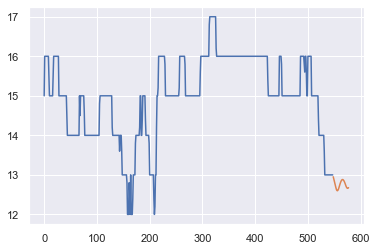

In [62]:
plt.plot(day_new,scaler.inverse_transform(data1))
plt.plot(day_pred,scaler.inverse_transform(lst_output))
plt.show()

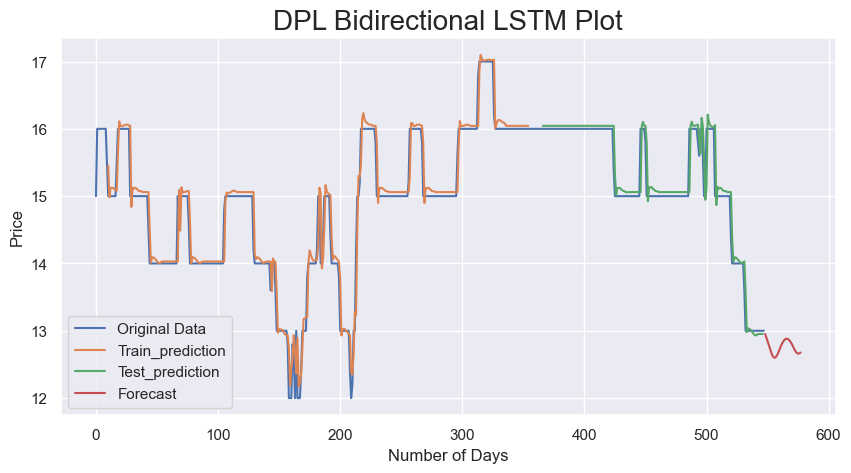

In [63]:
plt.figure(figsize=(10,5),dpi=100)
plt.plot(scaler.inverse_transform(data1), label='Original Data')
plt.plot(trainPredictPlot,label='Train_prediction')
plt.plot(testPredictPlot, label='Test_prediction')
plt.plot(day_pred,scaler.inverse_transform(lst_output), label='Forecast')
plt.title('DPL Bidirectional LSTM Plot', fontsize=20)
plt.ylabel('Price')
plt.xlabel('Number of Days')
plt.legend()
plt.show()

In [64]:
forecast = forecast.to_csv('predictedData/dpl_bilstm_forecast.csv')

In [65]:
len(testPredictPlot)

548

In [66]:
np.count_nonzero(np.isnan(testPredictPlot))

367

In [67]:
#convert numpy array to DF
test = pd.DataFrame(testPredictPlot, columns = ['predicted_price'])
test.head()

,predicted_price
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN


In [68]:
test.isnull().sum()

predicted_price    367
dtype: int64

In [69]:
test = test.dropna()
test

,predicted_price
366,16.044212
367,16.044212
368,16.044212
369,16.044212
370,16.044212
...,...
542,12.952032
543,12.952032
544,12.952032
545,12.952032


In [70]:
size = int(len(data) * 0.65)
size

356

In [71]:
#to know the date of test data
data.iloc[355+10:]  #10 for that time steps

,price
date,
2021-10-13,16.0
2021-10-14,16.0
2021-10-18,16.0
2021-10-19,16.0
2021-10-20,16.0
...,...
2022-07-11,13.0
2022-07-12,13.0
2022-07-13,13.0


In [72]:
test['date'] = pd.date_range(start='2021-10-13', periods=181, freq='D')
test

,predicted_price,date
366,16.044212,2021-10-13
367,16.044212,2021-10-14
368,16.044212,2021-10-15
369,16.044212,2021-10-16
370,16.044212,2021-10-17
...,...,...
542,12.952032,2022-04-07
543,12.952032,2022-04-08
544,12.952032,2022-04-09
545,12.952032,2022-04-10


In [73]:
col = ['date','predicted_price']
test = test[col]
test

,date,predicted_price
366,2021-10-13,16.044212
367,2021-10-14,16.044212
368,2021-10-15,16.044212
369,2021-10-16,16.044212
370,2021-10-17,16.044212
...,...,...
542,2022-04-07,12.952032
543,2022-04-08,12.952032
544,2022-04-09,12.952032
545,2022-04-10,12.952032


In [74]:
test = test.set_index('date')
test

,predicted_price
date,
2021-10-13,16.044212
2021-10-14,16.044212
2021-10-15,16.044212
2021-10-16,16.044212
2021-10-17,16.044212
...,...
2022-04-07,12.952032
2022-04-08,12.952032
2022-04-09,12.952032


In [85]:
test = test.to_csv('predictedData/dpl_bilstm_testPred.csv')

AttributeError: 'NoneType' object has no attribute 'to_csv'

In [118]:
rdata = pd.read_csv('dplrealdata.csv')
rdata.head()

,DateTime,DPL
0,7/15/2022 3:55,13.0
1,7/15/2022 4:55,13.0
2,7/15/2022 5:55,13.0
3,7/15/2022 7:55,13.0
4,7/15/2022 8:55,13.0


In [119]:
rdata['DateTime'] = pd.to_datetime(rdata['DateTime']).dt.date

#renaming the columns
rdata.rename(columns = {'DateTime':'date','DPL':'real price'}, inplace = True)
rdata['date'] = pd.to_datetime(rdata['date'],format = "%Y-%m-%d")
rdata

,date,real price
0,2022-07-15,13.00
1,2022-07-15,13.00
2,2022-07-15,13.00
3,2022-07-15,13.00
4,2022-07-15,13.00
...,...,...
291,2022-10-13,15.57
292,2022-10-13,15.57
293,2022-10-13,15.57
294,2022-10-13,15.57


In [120]:
rdata = rdata.groupby('date').mean()
rdata.head()

,real price
date,
2022-07-15,13.0
2022-07-18,13.0
2022-07-19,13.0
2022-07-20,13.0
2022-07-21,13.0


In [121]:
len(rdata)

60

In [122]:
rdata['Date'] = pd.date_range(start='2022-07-15', periods=60, freq='D')
rdata.head()

,real price,Date
date,,
2022-07-15,13.0,2022-07-15
2022-07-18,13.0,2022-07-16
2022-07-19,13.0,2022-07-17
2022-07-20,13.0,2022-07-18
2022-07-21,13.0,2022-07-19


In [123]:
rdata = rdata.reset_index()
rdata.head()

,date,real price,Date
0,2022-07-15,13.0,2022-07-15
1,2022-07-18,13.0,2022-07-16
2,2022-07-19,13.0,2022-07-17
3,2022-07-20,13.0,2022-07-18
4,2022-07-21,13.0,2022-07-19


In [124]:
rdata = rdata.drop('date', axis = 1)
rdata.head()

,real price,Date
0,13.0,2022-07-15
1,13.0,2022-07-16
2,13.0,2022-07-17
3,13.0,2022-07-18
4,13.0,2022-07-19


In [125]:
cols = ['Date','real price']
rdata[cols].head()

,Date,real price
0,2022-07-15,13.0
1,2022-07-16,13.0
2,2022-07-17,13.0
3,2022-07-18,13.0
4,2022-07-19,13.0


In [126]:
rdata = rdata.set_index('Date')
rdata.head()

,real price
Date,
2022-07-15,13.0
2022-07-16,13.0
2022-07-17,13.0
2022-07-18,13.0
2022-07-19,13.0


In [127]:
rdata = rdata.head(15)
rdata

,real price
Date,
2022-07-15,13.000
2022-07-16,13.000
2022-07-17,13.000
2022-07-18,13.000
2022-07-19,13.000
2022-07-20,13.000
2022-07-21,13.000
2022-07-22,13.000
2022-07-23,13.000
